In [1]:
# This will open the figure for you to select the angles
%matplotlib qt
# get the stack and downsample it
from deeptrace import *
from deeptrace.plotting import *
import time
tstart = time.time()
stack = BrainStack(['G:\\Baram_collab_lightsheet\\num_1\\230512_DPC1_488_s3_0_8x_15-37-35',
                  'G:\\Baram_collab_lightsheet\\num_1\\230512_DPC1_640_s3_0_8x_14-03-08'])

from tqdm.notebook import tqdm

pbar = tqdm()
res = stack.deeptrace_analysis(angles = None,
                               trailmap_models = [f for f in np.sort(trailmap_list_models())[:3]],
                               pbar = pbar)
pbar.close()
print(time.time() - tstart)

# this is where the selection is C:\cygwin\home\Milner\DeepTraCE\registration/model_selection

0it [00:00, ?it/s]

[DeepTraCE] Rotation angles are not set, please select at least one angle.
Downsampling channel 0 to G:\Baram_collab_lightsheet\num_1\deeptrace_analysis\230512_DPC1_488_s3_0_8x_15-37-35\scaled\230512_DPC1_488_s3_0_8x_15-37-35.tif.
442.9673399925232


In [2]:
res

{'x': array([[nan, nan, nan],
        [nan, nan, nan]], dtype=float32),
 'y': array([[nan, nan, nan],
        [nan, nan, nan]], dtype=float32),
 'z': array([[302., 203., 292.],
        [434., 274., 310.]], dtype=float32),
 'angles': [14.225963, 0, 0]}

In [3]:
# You can use this to check that the rotation makes sense
tt = rotate_stack(stack.downsampled_stack[0],*res['angles'])
interact_show_stack(tt)

In [4]:
# This will run TRAILMAP
pbar = tqdm()
res = stack.deeptrace_analysis(angles = [float(f) for f in res['angles']],
                               trailmap_models = [f for f in np.sort(trailmap_list_models())[:3]],
                               pbar = pbar)
pbar.close()
print(time.time() - tstart)

0it [00:00, ?it/s]

Loading TRAILMAP network and model.
Using model weight denardo_model1.hdf5
Created G:\Baram_collab_lightsheet\num_1\deeptrace_analysis\230512_DPC1_488_s3_0_8x_15-37-35\denardo_model1_seg_230512_DPC1_640_s3_0_8x_14-03-08
Loading TRAILMAP network and model.
Using model weight denardo_model2.hdf5
Created G:\Baram_collab_lightsheet\num_1\deeptrace_analysis\230512_DPC1_488_s3_0_8x_15-37-35\denardo_model2_seg_230512_DPC1_640_s3_0_8x_14-03-08
Loading TRAILMAP network and model.
Using model weight denardo_model3.hdf5
Created G:\Baram_collab_lightsheet\num_1\deeptrace_analysis\230512_DPC1_488_s3_0_8x_15-37-35\denardo_model3_seg_230512_DPC1_640_s3_0_8x_14-03-08
[DeepTraCE] Downsampling the alignment channel to G:\Baram_collab_lightsheet\num_1\deeptrace_analysis\230512_DPC1_488_s3_0_8x_15-37-35\rotated\align_channel.tiff
[DeepTraCE] Rotating the alignment channel
[DeepTraCE] Fitting the alignment channel with elastix
[DeepTraCE] Downsampling the denardo_model1_seg_230512_DPC1_640_s3_0_8x_14-03-08

In [6]:
# This does the counting and combines the models
# load results
params,autof,models = load_deeptrace_models(res['analysis_folder'])
print("Combining models") 
combined,model_selection = combine_models(models,default_model=2)
print("Refining model using connected components analysis")
refined_model = refine_connected_components(combined)
print("Performing quantification.")
res = count_labeling_density(refined_model, model_selection)


Combining models
Refining model using connected components analysis
Performing quantification.


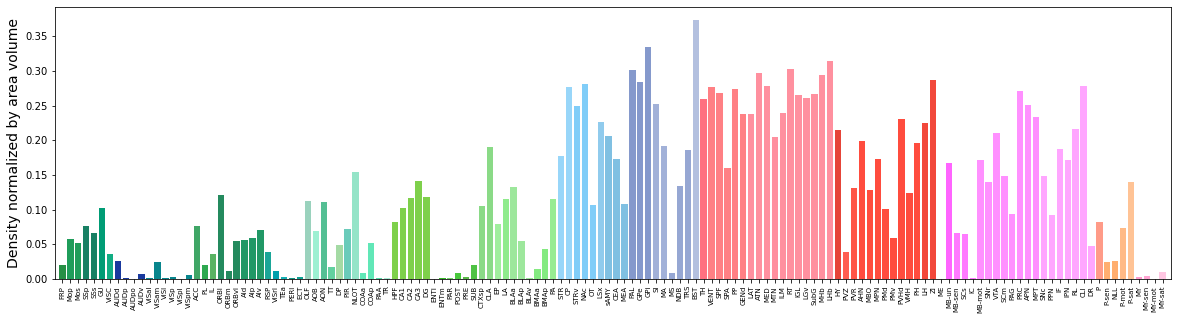

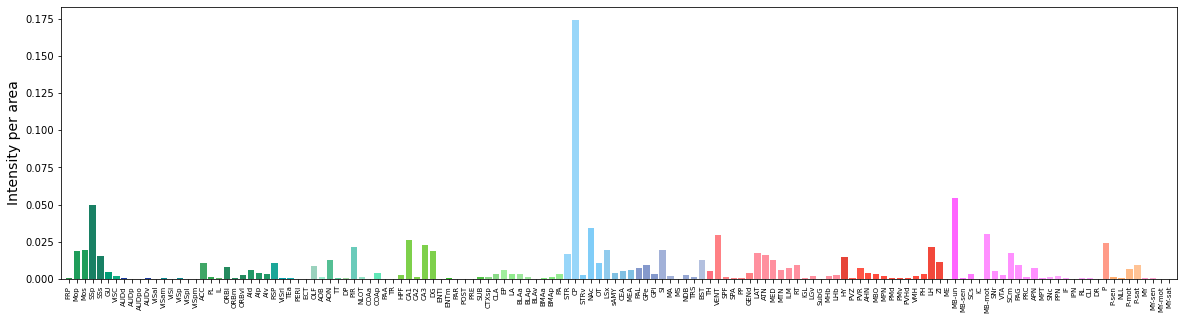

In [7]:
# this plots the qua
%matplotlib inline

plt.figure(figsize = [20,5])
plt.bar(np.arange(len(res)),np.array(res.density),color = res.color)
plt.xticks(np.arange(len(res)),res.acronym,rotation = 90,fontsize = 7);
plt.xlim([-1,len(res)])
plt.ylabel('Density normalized by area volume',fontsize = 14)

plt.figure(figsize = [20,5])
plt.bar(np.arange(len(res)),res.count_pixels/np.sum(res.count_pixels),color = res.color)
plt.xticks(np.arange(len(res)),res.acronym,rotation = 90,fontsize = 7);
plt.xlim([-1,len(res)])
plt.ylabel('Intensity per area',fontsize = 14);

In [ ]:
# display the refined model and the atlas
atlas,ontology,header = read_atlas()
interact_stack_overlay_areas(refined_model,atlas)

In [9]:
print(res)

    acronym                           atlas_name  model             atlas_ids  \
0       FRP      'Frontal pole, cerebral cortex'      1                 [184]   
1       Mop                 'Primary motor area'      1                 [985]   
2       Mos               'Secondary motor area'      1                 [993]   
3       SSp         'Primary somatosensory area'      1                 [322]   
4       SSs    'Supplemental somatosensory area'      1                 [378]   
..      ...                                  ...    ...                   ...   
135   P-sat     'Pons, behavioral state related'      3                [1117]   
136      MY                            'Medulla'      3  [354, 386, 370, 379]   
137  MY-sen           'Medulla, sensory related'      3                 [386]   
138  MY-mot             'Medulla, motor related'      3                 [370]   
139  MY-sat  'Medulla, behavioral state related'      3                 [379]   

     volume_pixels  count_p

In [8]:
res.to_csv('G:\\Baram_collab_lightsheet\\num_9\\deeptrace_analysis\\230511_DPC1_488_s3_0_8x_16-05-01\\num_1_data.csv')